In [1]:
import pandas as pd
import gdown 
gdown.download('https://drive.google.com/uc?id={}'.format('1wdbtj2s9Vst5EQll1oqc1qXx-_tTv7Cf'),'DCOILBRENTEU.csv',quiet=False)
df_data_1 = pd.read_csv("DCOILBRENTEU.csv")

Downloading...
From: https://drive.google.com/uc?id=1wdbtj2s9Vst5EQll1oqc1qXx-_tTv7Cf
To: /content/DCOILBRENTEU.csv
100%|██████████| 143k/143k [00:00<00:00, 34.3MB/s]


In [2]:
df_data_1.head()

,DATE,DCOILBRENTEU
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [3]:
df_data_1 = df_data_1[df_data_1.DCOILBRENTEU != "."]
print(df_data_1.shape)

(8156, 2)


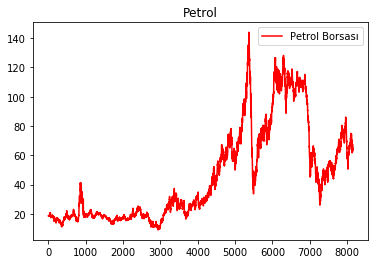

In [4]:
import matplotlib.pyplot as plt
df_data_1_plot = df_data_1.iloc[:,1].values.astype(float)

plt.plot(df_data_1_plot, color = "red", label = "Petrol Borsası")
plt.title("Petrol")
plt.legend()
plt.show()

In [0]:
import numpy as np


In [0]:
batch_size = 64
epochs = 120
timesteps = 30

In [7]:
length = len(df_data_1)
print(length)
length *= 1 - 0.1
print(length)

8156
7340.400000000001


In [0]:
def get_train_length(dataset, batch_size, test_percent):
    # substract test_percent to be excluded from training, reserved for testset
    length = len(dataset)
    length *= 1 - test_percent
    train_length_values = []
    for x in range(int(length) - 100,int(length)): 
        modulo=x%batch_size
        if (modulo == 0):
            train_length_values.append(x)
            print(x)
    return (max(train_length_values))

In [9]:
length = get_train_length(df_data_1, 64, 0.1)
print(length)

7296
7296


In [10]:
upper_train = length + timesteps * 2
df_data_1_train = df_data_1[0:upper_train]
training_set = df_data_1_train.iloc[:,1:2].values
training_set.shape

(7356, 1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(np.float64(training_set))
training_set_scaled.shape

print(min(training_set))
print(min(training_set_scaled))

['10.05']
[0.]


In [12]:
X_train = []
y_train = []

print(length+timesteps)

for i in range(timesteps, length + timesteps):
  X_train.append(training_set_scaled[i-timesteps:i,0])
  y_train.append(training_set_scaled[i:i+timesteps,0])
  
  
print(len(X_train))
print(len(y_train))

print(X_train[0:2])
print(np.array(X_train).shape)

print(y_train[0:2])
print(np.array(y_train).shape)
  
  

7326
7296
7296
[array([0.07067112, 0.0693363 , 0.07007786, 0.07044865, 0.07067112,
       0.07044865, 0.07044865, 0.07030033, 0.07081943, 0.0710419 ,
       0.07156099, 0.07178346, 0.07081943, 0.07156099, 0.07178346,
       0.07178346, 0.0710419 , 0.07178346, 0.07267334, 0.07363737,
       0.07378569, 0.07378569, 0.07415647, 0.07267334, 0.07156099,
       0.07119021, 0.07400816, 0.07452725, 0.07400816, 0.07326659]), array([0.0693363 , 0.07007786, 0.07044865, 0.07067112, 0.07044865,
       0.07044865, 0.07030033, 0.07081943, 0.0710419 , 0.07156099,
       0.07178346, 0.07081943, 0.07156099, 0.07178346, 0.07178346,
       0.0710419 , 0.07178346, 0.07267334, 0.07363737, 0.07378569,
       0.07378569, 0.07415647, 0.07267334, 0.07156099, 0.07119021,
       0.07400816, 0.07452725, 0.07400816, 0.07326659, 0.07526882])]
(7296, 30)
[array([0.07526882, 0.07586207, 0.07697442, 0.07712273, 0.07697442,
       0.07845755, 0.07882833, 0.07956989, 0.07994067, 0.08290693,
       0.08379681, 0.08550241,

In [13]:
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train,  (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train,  (y_train.shape[0], y_train.shape[1],1))

print(X_train.shape)
print(y_train.shape)

(7296, 30, 1)
(7296, 30, 1)


In [14]:
from keras.layers import Dense, Input, LSTM
from keras.models import Model
import h5py


Using TensorFlow backend.


In [17]:
from keras.layers import CuDNNLSTM
input_1 = Input(batch_shape = (64,timesteps,1), name = "input1")
lstm_1 = CuDNNLSTM(10, stateful = True, return_sequences = True, name = "lstm_1")(input_1)
lstm_2 = CuDNNLSTM(10, stateful = True, return_sequences = True, name = "lstm_2")(lstm_1)
output_1 = Dense(1,)(lstm_2)

modelim = Model(inputs=input_1, outputs=output_1)

modelim.compile(optimizer="adam", loss = "mae")
modelim.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input1 (InputLayer)          (64, 30, 1)               0         
_________________________________________________________________
lstm_1 (CuDNNLSTM)           (64, 30, 10)              520       
_________________________________________________________________
lstm_2 (CuDNNLSTM)           (64, 30, 10)              880       
_________________________________________________________________
dense_2 (Dense)              (64, 30, 1)               11        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [18]:
epochs = 100
for i in range(epochs):
  print("Epoch" + str(i))
  modelim.fit(X_train,y_train,shuffle=False, epochs= 1, batch_size = 64)
  modelim.reset_states()
  

Epoch0
Epoch 1/1
7296/7296 [==============================] - 4s 544us/step - loss: 0.0527
Epoch1
Epoch 1/1
7296/7296 [==============================] - 1s 101us/step - loss: 0.0717
Epoch2
Epoch 1/1
7296/7296 [==============================] - 1s 103us/step - loss: 0.0889
Epoch3
Epoch 1/1
7296/7296 [==============================] - 1s 103us/step - loss: 0.0955
Epoch4
Epoch 1/1
7296/7296 [==============================] - 1s 102us/step - loss: 0.1056
Epoch5
Epoch 1/1
7296/7296 [==============================] - 1s 101us/step - loss: 0.0991
Epoch6
Epoch 1/1
7296/7296 [==============================] - 1s 102us/step - loss: 0.0846
Epoch7
Epoch 1/1
7296/7296 [==============================] - 1s 101us/step - loss: 0.0751
Epoch8
Epoch 1/1
7296/7296 [==============================] - 1s 103us/step - loss: 0.0662
Epoch9
Epoch 1/1
7296/7296 [==============================] - 1s 102us/step - loss: 0.0598
Epoch10
Epoch 1/1
7296/7296 [==============================] - 1s 104us/step - loss: 0.055

In [0]:
import h5py
modelim.save(filepath = "modelim_30win.h5")

In [20]:
!ls

DCOILBRENTEU.csv  modelim_30win.h5  sample_data


In [0]:

def get_test_length(dataset, batch_size):
    
    test_length_values = []
    for x in range(len(dataset) - 200, len(dataset) - timesteps*2): 
        modulo=(x-upper_train)%batch_size
        if (modulo == 0):
            test_length_values.append(x)
            #print(x)
    return (max(test_length_values))



In [24]:
test_length = get_test_length(df_data_1,64)
print(test_length)

8060


In [26]:
upper_test = test_length + timesteps * 2
testset_length = test_length - upper_train
print(testset_length)

704


In [0]:
df_data_1_test = df_data_1[upper_train:upper_test]
test_set = df_data_1_test.iloc[:,1:2].values

scaled_test = sc.fit_transform(np.float64(test_set))

X_test = []

for i in range(timesteps, testset_length + timesteps):
  X_test.append(scaled_test[i-timesteps : i , 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


In [36]:
X_test.shape

(704, 30, 1)

In [38]:
predicted_test = modelim.predict(X_test, batch_size = 64)
#modelim.reset_states()

predicted_test = np.reshape(predicted_test, (predicted_test.shape[0],predicted_test.shape[1]))

print(predicted_test.shape)

(704, 30)


In [40]:
predicted_test = sc.inverse_transform(predicted_test)

y_test = []

for j in range(0,testset_length - timesteps):
  y_test = np.append(y_test, predicted_test[j, timesteps - 1])
  
y_test = np.reshape(y_test, (y_test.shape[0],1))  

print(y_test.shape)


(674, 1)


W0713 10:51:22.582308 140231956400000 legend.py:1289] No handles with labels found to put in legend.


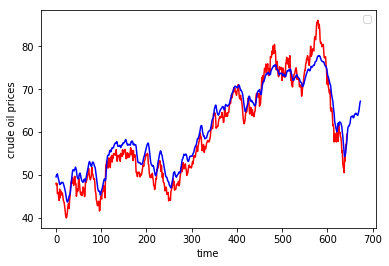

In [43]:
plt.plot(test_set[timesteps:len(y_test)].astype(float), color = "red")
plt.plot(y_test[0:len(y_test)].astype(float),color = "blue")
plt.xlabel("time")
plt.ylabel("crude oil prices")
plt.legend()

plt.show()